<a href="https://colab.research.google.com/github/melihkurtaran/MachineLearning/blob/main/UnsupervisedLearning/UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Unsupervised Learning Project**

Author: Melih Kurtaran

In [19]:
#Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import v_measure_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import homogeneity_score, completeness_score

My group number is 9 so the classes I use 0, 4 and 8.

In [3]:
# Load the digits dataset
digits = load_digits()

# Create a boolean mask for the samples that correspond to class 0, 4, 8
mask = (digits.target == 0) | (digits.target == 4) | (digits.target == 8)

# Apply the mask to the data and target arrays
X = digits.data[mask]
y = digits.target[mask]

Plotting examples from each class

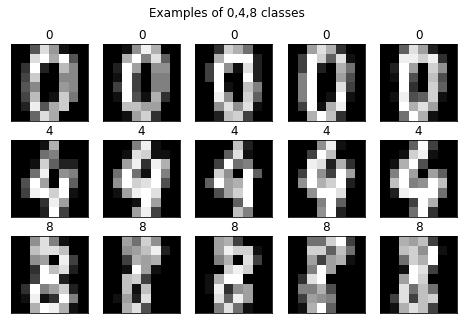

In [6]:
#Select some examples of each class
examples_0 = X[y == 0][:5]
examples_4 = X[y == 4][:5]
examples_8 = X[y == 8][:5]

# Plot the examples
fig, axes = plt.subplots(3, 5, figsize=(8, 5),
                         subplot_kw={'xticks':[], 'yticks':[]})
fig.suptitle("Examples of 0,4,8 classes")
for ax, example in zip(axes[0], examples_0):
    ax.imshow(example.reshape(8, 8), cmap='gray')
    ax.set_title("0")
for ax, example in zip(axes[1], examples_4):
    ax.imshow(example.reshape(8, 8), cmap='gray')
    ax.set_title("4")
for ax, example in zip(axes[2], examples_8):
    ax.imshow(example.reshape(8, 8), cmap='gray')
    ax.set_title("8")

plt.show()

# **T1**

## **a) Cluster your dataset**

Clustering the dataset for m = 3 clusters, the Euclidean distance and the complete linkage, the average
linkage and the ward algorithms. Reporting on the performance attained by each clustering method using the
v-measure.

In [10]:
# function for training different models
def cluster_and_evaluate(X, y, model, linkage=None):
    """
    Cluster the data using the specified model and linkage, and evaluate the performance using v-measure.
    :param X: The input data.
    :param y: The true labels.
    :param model: The clustering model to use.
    :param linkage: The linkage method to use for agglomerative clustering.
    :return: The v-measure score.
    """
    if model == "kmeans":
        clusterer = KMeans(n_clusters=3)
    elif model == "agg":
        clusterer = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    else:
        raise ValueError("Invalid model")
    
    # Fit the model to the data
    clusterer.fit(X)
    
    # Get the cluster labels
    labels = clusterer.labels_
    
    # Compute the v-measure score
    v_measure = v_measure_score(y, labels)
    
    return v_measure

In [12]:
# Cluster and evaluate KMeans with the Euclidean distance
kmeans_v_measure = cluster_and_evaluate(X, y, "kmeans")
print("KMeans v-measure with the Euclidean distance:", kmeans_v_measure)

# Cluster and evaluate Agglomerative Clustering with linkage 'complete'
agg_complete_v_measure = cluster_and_evaluate(X, y, "agg", linkage='complete')
print("AgglomerativeClustering with linkage 'complete' v-measure:", agg_complete_v_measure)

# Cluster and evaluate Agglomerative Clustering with linkage 'average'
agg_average_v_measure = cluster_and_evaluate(X, y, "agg", linkage='average')
print("AgglomerativeClustering with linkage 'average' v-measure:", agg_average_v_measure)

# Cluster and evaluate Agglomerative Clustering with linkage 'ward'
agg_ward_v_measure = cluster_and_evaluate(X, y, "agg", linkage='ward')
print("AgglomerativeClustering with linkage 'ward' v-measure:", agg_ward_v_measure)

KMeans v-measure with the Euclidean distance: 0.9340007391665218
AgglomerativeClustering with linkage 'complete' v-measure: 0.6532613395268002
AgglomerativeClustering with linkage 'average' v-measure: 0.9447217560421027
AgglomerativeClustering with linkage 'ward' v-measure: 0.9739706119388045


It is seen that best performing one is The AgglomerativeClustering algorithm with linkage 'ward'

In [13]:
# choose the best performing algorithm
best_algorithm = max(kmeans_v_measure,agg_complete_v_measure,agg_average_v_measure,agg_ward_v_measure)

if best_algorithm == kmeans_v_measure:
    print("The KMeans algorithm is the best performing method with a v-measure score of {:.4f}".format(kmeans_v_measure))
elif best_algorithm == agg_complete_v_measure:
    print("The AgglomerativeClustering algorithm with linkage 'complete' is the best performing method with a v-measure score of {:.4f}".format(agg_complete_v_measure))
elif best_algorithm == agg_average_v_measure:
    print("The AgglomerativeClustering algorithm with linkage 'average' is the best performing method with a v-measure score of {:.4f}".format(agg_average_v_measure))
else:
    print("The AgglomerativeClustering algorithm with linkage 'ward' is the best performing method with a v-measure score of {:.4f}".format(agg_ward_v_measure))


The AgglomerativeClustering algorithm with linkage 'ward' is the best performing method with a v-measure score of 0.9740


## **b) Trying out different number of clusters**

For the best performing algorithm, reporting on its performance using again the v-measure and for m = 2, 3, 4 and 5 clusters.

In [18]:
best_v_measure = 0
best_n_clusters = 0
for n_clusters in [2, 3, 4, 5]:
    agg_ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    agg_ward.fit(X)
    labels = agg_ward.labels_
    v_measure = v_measure_score(y, labels)
    print("For {} clusters, the AgglomerativeClustering algorithm with linkage 'ward' has a v-measure of {:.4f}".format(n_clusters, v_measure))
    if v_measure > best_v_measure:
        best_v_measure = v_measure
        best_n_clusters = n_clusters
print("The best performance corresponds to {} clusters with a v-measure of {:.4f}".format(best_n_clusters, best_v_measure))


For 2 clusters, the AgglomerativeClustering algorithm with linkage 'ward' has a v-measure of 0.7341
For 3 clusters, the AgglomerativeClustering algorithm with linkage 'ward' has a v-measure of 0.9740
For 4 clusters, the AgglomerativeClustering algorithm with linkage 'ward' has a v-measure of 0.8829
For 5 clusters, the AgglomerativeClustering algorithm with linkage 'ward' has a v-measure of 0.8125
The best performance corresponds to 3 clusters with a v-measure of 0.9740


It is clearly seen that the best performance correspond to m = 3

## **c) Contingency Matrix and reporting measures**

Contingency Matrix is shown

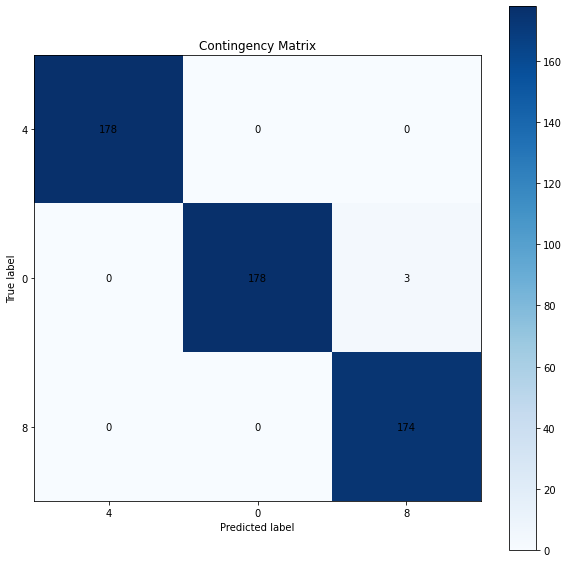

In [57]:
# Compute the contingency matrix for m=3
agg_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_ward.fit(X)
labels = agg_ward.labels_

#to map classes to its corresponding label
labels = np.where(labels == 0, 4, labels)
labels = np.where(labels == 1, 0, labels)
labels = np.where(labels == 2, 8, labels)

contingency_matrix = confusion_matrix(y, labels)

# Create a figure with a specified size
plt.figure(figsize=(10, 10))

# Plot the contingency matrix with a color map
plt.imshow(contingency_matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Add numbers to the cells
for i in range(3):
    for j in range(3):
        plt.text(j, i, contingency_matrix[i, j], ha='center', va='center', color='black')

# Add class names to the x and y axis
class_names = ["4", "0", "8"]
plt.xticks(np.arange(3), class_names)
plt.yticks(np.arange(3), class_names)
plt.title("Contingency Matrix")

plt.show()

In [41]:
contingency_matrix

array([[178,   0,   0],
       [  0, 178,   3],
       [  0,   0, 174]])

Identifying the number of incorrectly clustered samples and calculating the percentage of errors

In [54]:
# Identify the number of incorrectly clustered samples
incorrectly_clustered_samples = np.sum(contingency_matrix) - np.sum(np.diag(contingency_matrix))
total_samples = np.sum(contingency_matrix)
percentage_errors = incorrectly_clustered_samples / total_samples

print("The number of incorrectly clustered samples is {} out of {} ({:.2f}% error)"
.format(incorrectly_clustered_samples, total_samples, (percentage_errors*100)))


The number of incorrectly clustered samples is 3 out of 533 (0.56% error)


Reporting on the homogeneity and the completeness measures

In [55]:
# Compute homogeneity and completeness measures
homogeneity = homogeneity_score(y, labels)
completeness = completeness_score(y, labels)

print("Homogeneity measure: {:.4f}".format(homogeneity))
print("Completeness measure: {:.4f}".format(completeness))

Homogeneity measure: 0.9740
Completeness measure: 0.9739


Only 3 samples are clustered incorrectly and those are 0 values that is confused as 8 values by the model.

## **d)**

In [60]:
# Find the indexes of misclassified samples
misclassified_indexes = np.where(y != labels)[0]
misclassified_indexes

array([478, 482, 489])

<Figure size 432x288 with 0 Axes>

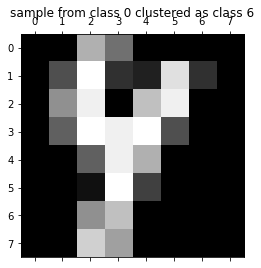

In [63]:
plt.figure()
plt.gray()
plt.matshow(X[489].reshape(8,8))
plt.title('sample from class 0 clustered as class 6')
plt.show()